<a href="https://colab.research.google.com/github/ColaMiniac/ST_Assignment/blob/main/Price_prediction_u3270681.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


#1.reading the dataset
ECdata_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/Train.csv')
ECdata_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/Test.csv')
print(f"shape before deleting duplicate values:{ECdata_train.shape}")

#remove duplicate rows
ECdata_train = ECdata_train.drop_duplicates()
print(f"shape after deleting duplicate values:{ECdata_train.shape}")

#observing the two datasets
print(ECdata_train.head())
print(Ecdata_test.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shape before deleting duplicate values:(2452, 8)
shape after deleting duplicate values:(2452, 8)
  Product Product_Brand             Item_Category     Subcategory_1  \
0  P-2610         B-659        bags wallets belts              bags   
1  P-2453        B-3078                  clothing  women s clothing   
2  P-6802        B-1810  home decor festive needs        showpieces   
3  P-4452        B-3078  beauty and personal care          eye care   
4  P-8454        B-3078                  clothing    men s clothing   

       Subcategory_2  Item_Rating        Date  Selling_Price  
0          hand bags          4.3    2/3/2017          291.0  
1       western wear          3.1    7/1/2015          897.0  
2             ethnic          3.5   1/12/2019          792.0  
3  h2o plus eye care          4.0  12/12/2014          837.0  
4           t shirts          4.


data description:

*   Product: the name of the product being sold.
*   Product_Brand: the brand of the product.
*   Item_Category: the category of the product
*   Subcategory_1 and Subcategory_2: more detailed product category
*   Item_Rating: the rating or feedback score assigned to the product by customers or users
*   Date: the date when the product was sold
*   Selling_Price: the price at which the product is being sold.

2. problem statement definition
This analysis aims to develop a price predicition model based on the train dataset it provides, then use it to predict the price on the test dataset.

3. choosing appropriate algorithm for data analysis
Based on the data provided, multiple-linear regression is the appropriate method for the analysis.

<Axes: >

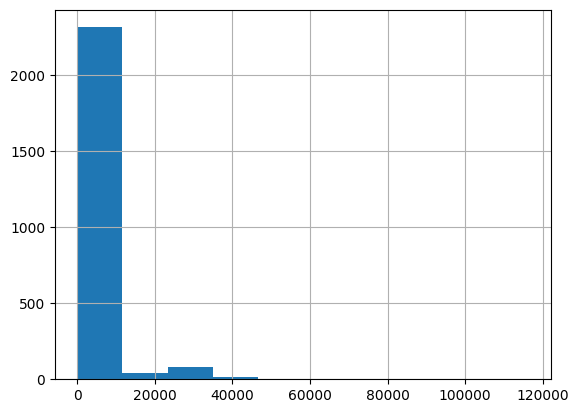

In [ ]:
#4.look at class distribution
%matplotlib inline
ECdata_train['Selling_Price'].hist()


In [ ]:
#check the skewness of the data
from scipy.stats import skew

selling_price_skewness = skew(ECdata_train['Selling_Price'])
print("Skewness of Selling Price:", selling_price_skewness)

Skewness of Selling Price: 5.535226818210943


Observation from step4
Base on the diagram and the skewness, the data is highly skewed, it needs to be processed before further uses.




In [ ]:
#5.basic exploratory data analysis
ECdata_train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [ ]:
ECdata_train.tail()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
2447,P-8870,B-2292,clothing,kids clothing,girls wear,2.3,11/3/2017,741.0
2448,P-10672,B-3078,footwear,women s footwear,casual shoes,1.9,4/12/2016,1590.0
2449,P-2134,B-479,clothing,men s clothing,t shirts,1.9,19/4/2019,995.0
2450,P-724,B-133,automotive,accessories spare parts,car interior exterior,2.7,1/12/2014,1598.0
2451,P-1154,B-174,bags wallets belts,bags,pouches and potlis,4.1,3/3/2019,397.0


In [ ]:
ECdata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [ ]:
ECdata_train.describe(include='all')

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
count,2452,2452,2452,2452,2452,2452.000000,2452,2452.000000
unique,2452,1010,75,130,336,NaN,483,NaN
top,P-2610,B-3078,clothing,women s clothing,western wear,NaN,1/12/2013,NaN
freq,1,688,717,476,267,NaN,86,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.078467,NaN,2494.375612
std,NaN,NaN,NaN,NaN,NaN,1.187137,NaN,7115.256516
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,33.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,371.000000
50%,NaN,NaN,NaN,NaN,NaN,3.100000,NaN,596.000000
75%,NaN,NaN,NaN,NaN,NaN,4.100000,NaN,1195.250000


In [ ]:
ECdata_train.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

Observation from step5:
there is no null data in the dataset, but there are string type datas, it needs to be trasformed into numeric data before the regression.
Only Item_Rating and Selling_price are continuous data, the rest of the data are categorical data.

6.Identifying and Rejecting useless columns
All the columns are useful.

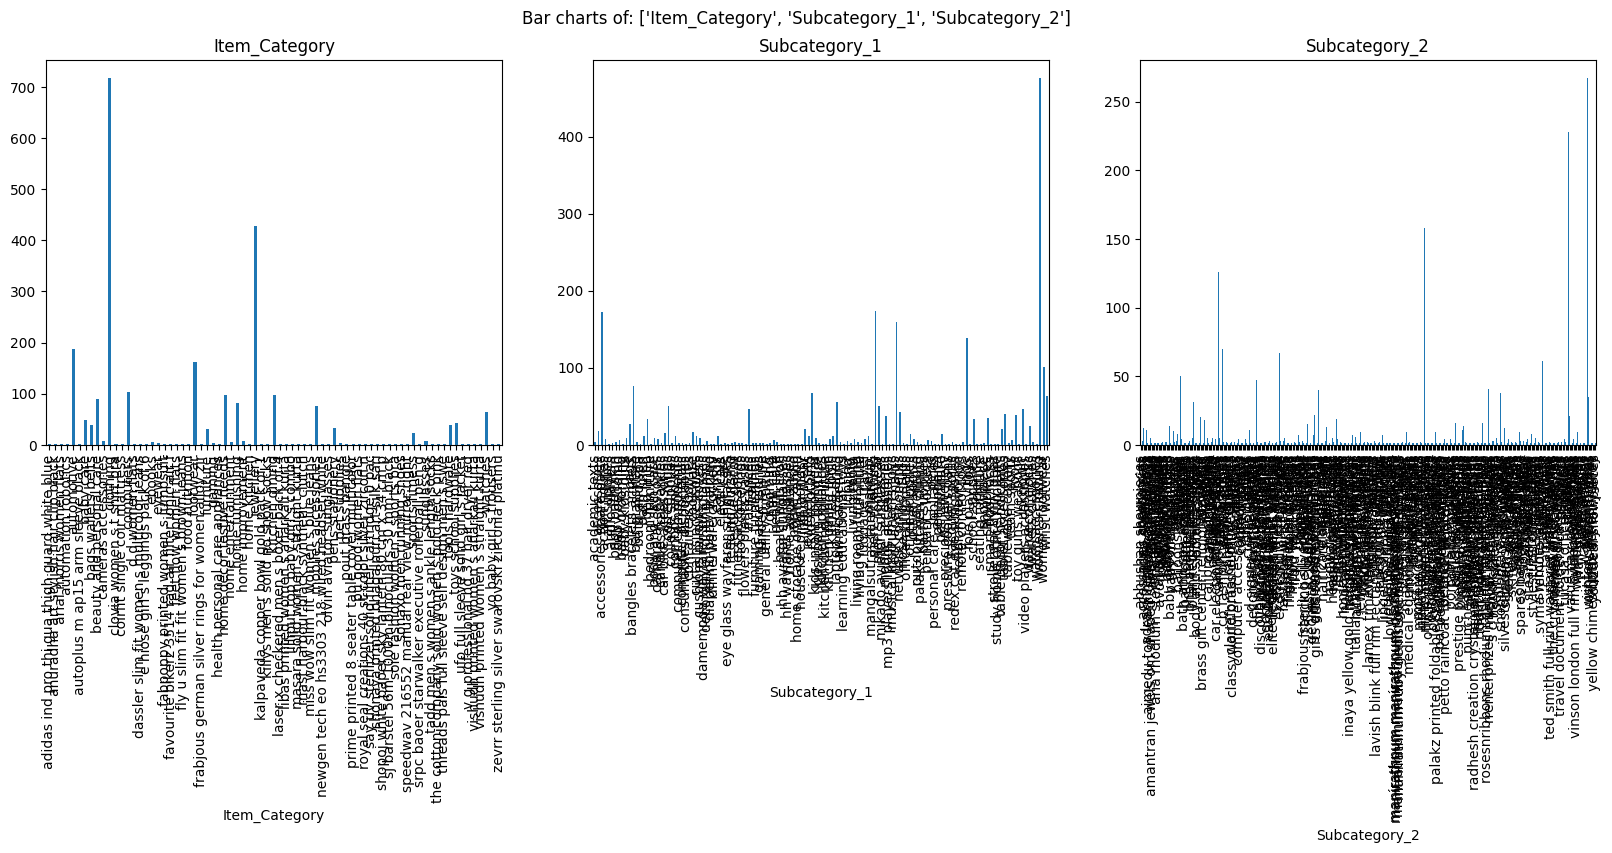

In [ ]:
#7.Visual Exploratory Data Analysis of data

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        ax = inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])
        ax.set_title(colName)  # Set title for each subplot
PlotBarCharts(inpData=ECdata_train,colsToPlot=['Item_Category','Subcategory_1','Subcategory_2'])


array([[<Axes: title={'center': 'Item_Rating'}>,
        <Axes: title={'center': 'Selling_Price'}>]], dtype=object)

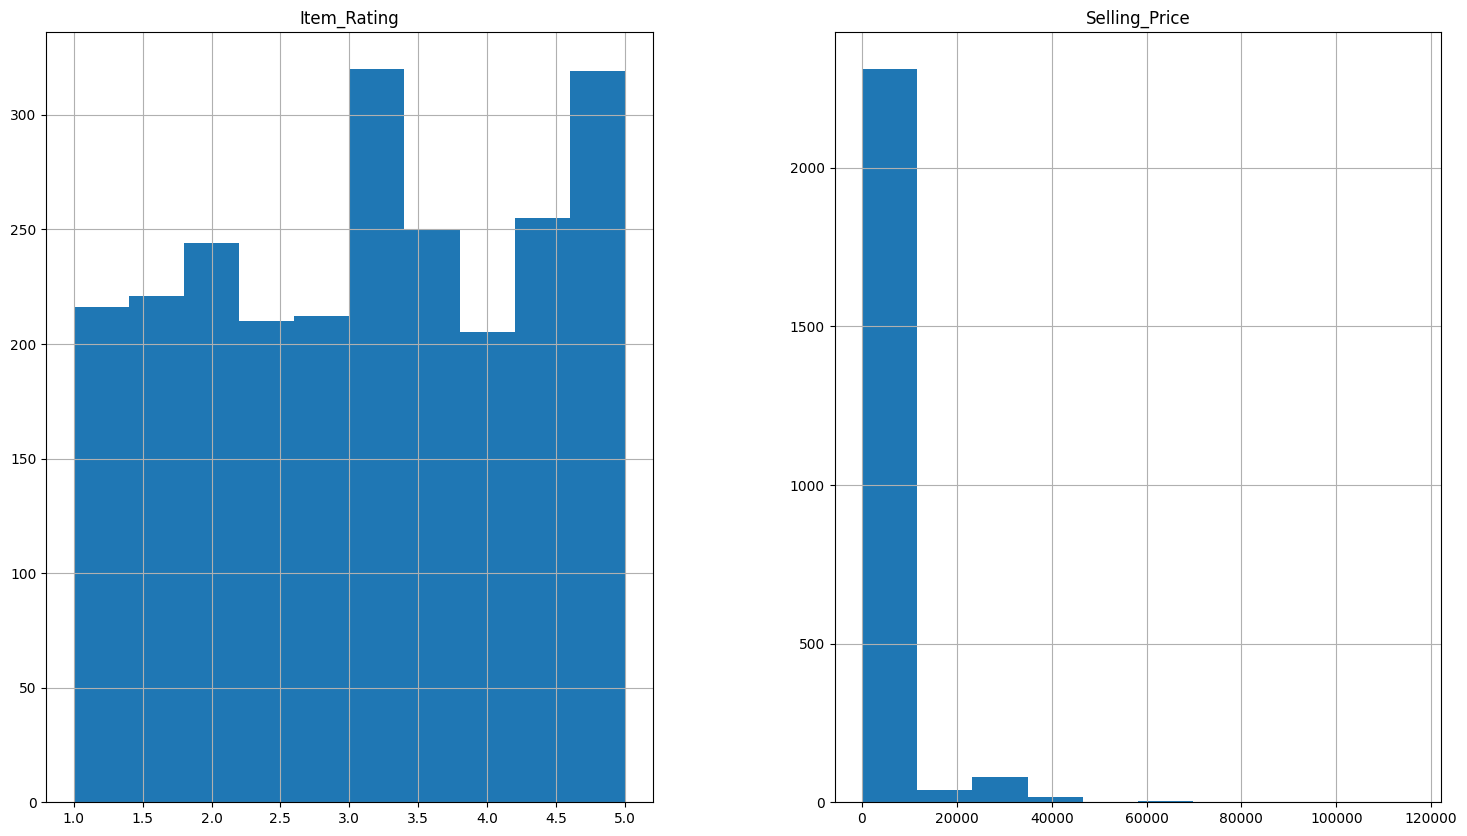

In [ ]:
ECdata_train.hist(['Item_Rating', 'Selling_Price'], figsize=(18, 10))

In [ ]:
#9.Outlier data and missing value
#replacing outlier data in selling price
ECdata_train['Selling_Price'][ECdata_train["Selling_Price"]<40000].sort_values(ascending=False)

548     39991.0
2168    39201.0
1193    38806.0
1668    38282.0
263     37947.0
         ...   
1060       70.0
1790       69.0
1382       64.0
1788       42.0
1950       33.0
Name: Selling_Price, Length: 2445, dtype: float64

Skewness of Selling Price: 4.048744971677069


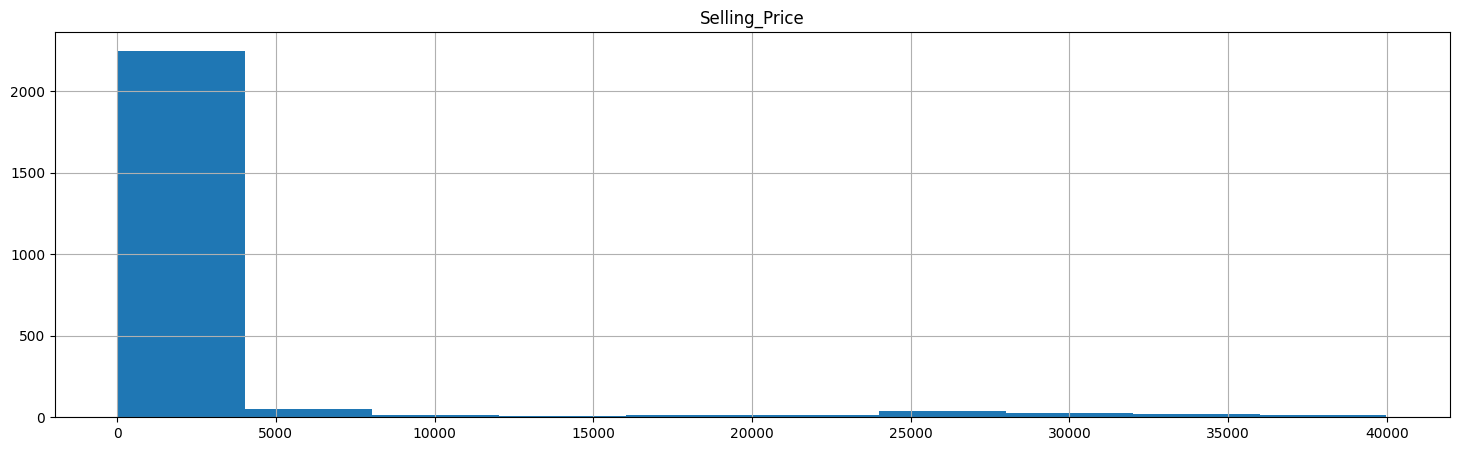

In [ ]:
ECdata_train['Selling_Price'][ECdata_train["Selling_Price"]>40000]=39991
ECdata_train.hist(['Selling_Price'],figsize=(18,5))
from scipy.stats import skew

selling_price_skewness = skew(ECdata_train['Selling_Price'])
print("Skewness of Selling Price:", selling_price_skewness)

In [ ]:
#finding the missing values
ECdata_train.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

No missing value

8.Feature selection
The target variable is selling price, which is continuous


<Axes: title={'center': 'Item Rating VS Selling Price'}, xlabel='Item_Rating', ylabel='Selling_Price'>

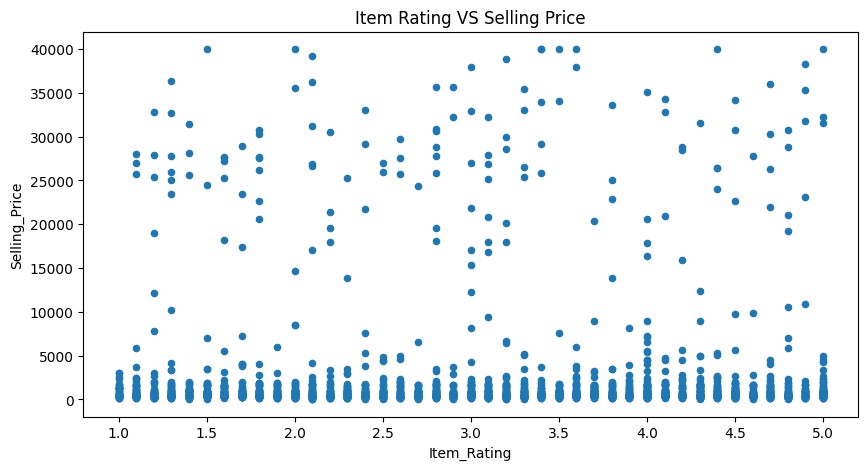

In [ ]:
ECdata_train.plot.scatter(x='Item_Rating',y='Selling_Price',figsize=(10,5),title="Item Rating VS Selling Price")

There is no clear trend

In [ ]:
#calculating correlation matrix
ContinuousCols=['Item_Rating','Selling_Price']
CorrelationData=ECdata_train[ContinuousCols].corr()
CorrelationData

,Item_Rating,Selling_Price
Item_Rating,1.000000,-0.015093
Selling_Price,-0.015093,1.000000


The correlation is close to 0,thus Item_Rating is irrelevant to Selling_Price

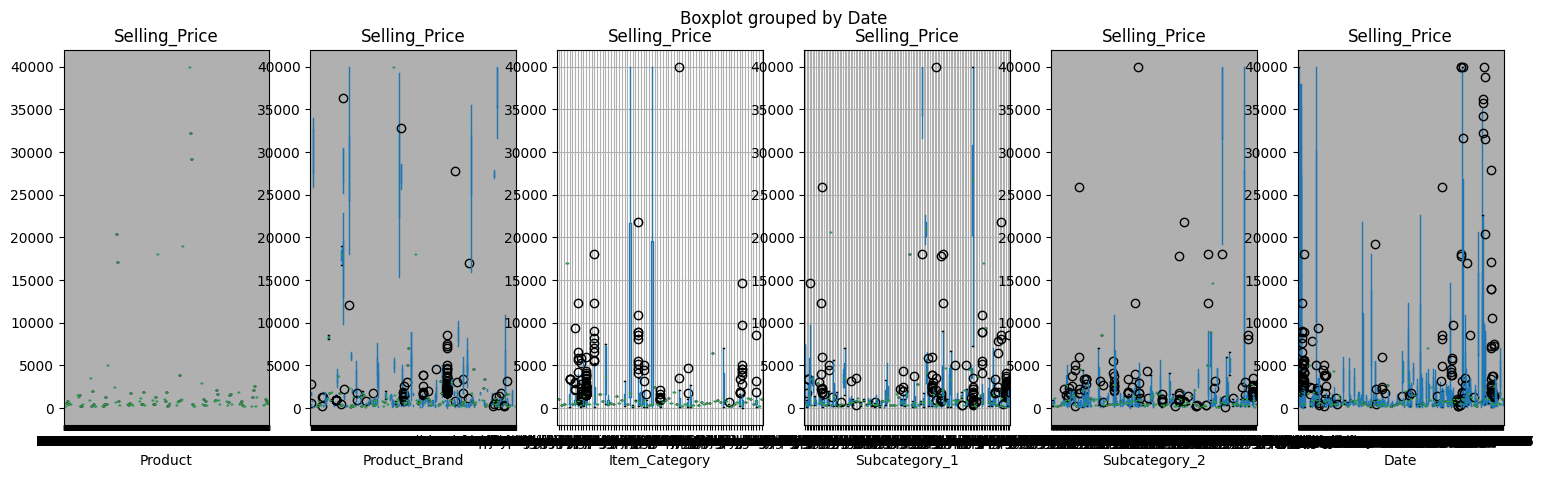

In [ ]:
#drawing box plots
CategoricalColList=['Product','Product_Brand','Item_Category','Subcategory_1','Subcategory_2','Date']

import matplotlib.pyplot as plt
fig,PlotCanvas = plt.subplots(nrows=1,ncols=len(CategoricalColList),figsize=(18,5))

for PredictorCol, i in zip(CategoricalColList,range(len(CategoricalColList))):
  ECdata_train.boxplot(column='Selling_Price',by=PredictorCol,figsize=(5,5),vert=True,ax=PlotCanvas[i])

The boxplot is hard to read, we need to rely on the ANOVA test

In [ ]:
#ANOVA test
def FunctionAnova(inpData,TargetVariable,CategoricalPredictorList):
  from scipy.stats import f_oneway
#create an empty list of selected predictors
  SelectedPredictors=[]

  print('ANOVA Result\n')
  for predictor in CategoricalPredictorList:
    CategoricalGroupList=inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults=f_oneway(*CategoricalGroupList)

    if(AnovaResults[1]<0.05):
      print(predictor,'is correlated with',TargetVariable,'|p-value:',AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor,'is NOT correlated with',TargetVariable,'|p-value:',AnovaResults[1])
  return(SelectedPredictors)

CategoricalPredictorList=['Product','Product_Brand','Item_Category','Subcategory_1','Subcategory_2','Date']
FunctionAnova(inpData=ECdata_train,TargetVariable='Selling_Price',CategoricalPredictorList=CategoricalPredictorList)

ANOVA Result

Product is NOT correlated with Selling_Price |p-value: nan
Product_Brand is correlated with Selling_Price |p-value: 0.0
Item_Category is correlated with Selling_Price |p-value: 1.875693426994365e-84
Subcategory_1 is correlated with Selling_Price |p-value: 0.0
Subcategory_2 is correlated with Selling_Price |p-value: 3.7674280304700685e-177
Date is correlated with Selling_Price |p-value: 1.5931810379418642e-50


['Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2', 'Date']

In [ ]:
#Selecting final column
SelectedColumns=['Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2', 'Date']
DataForML=ECdata_train[SelectedColumns]
DataForML.head()

# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
#11.Data Conversion to numeric values for machine learning/predictive analysis
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML,dtype=int)
# Adding Target Variable to the data
DataForML_Numeric['Selling_Price']=ECdata_train['Selling_Price']
# Printing sample rows
DataForML_Numeric.head()

,Product_Brand_B-1,Product_Brand_B-1000,Product_Brand_B-1004,Product_Brand_B-1008,Product_Brand_B-1009,Product_Brand_B-101,Product_Brand_B-1016,Product_Brand_B-1017,Product_Brand_B-1018,Product_Brand_B-1019,...,Date_8/5/2020,Date_9/3/2013,Date_9/3/2018,Date_9/4/2014,Date_9/4/2020,Date_9/6/2013,Date_9/6/2014,Date_9/6/2015,Date_9/6/2017,Selling_Price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,291.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,897.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,792.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,837.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,470.0


In [ ]:
#12.Training/Testing Sampling and K-fold cross validation
# Printing all the column names for our reference
DataForML_Numeric.columns


Index(['Product_Brand_B-1', 'Product_Brand_B-1000', 'Product_Brand_B-1004',
       'Product_Brand_B-1008', 'Product_Brand_B-1009', 'Product_Brand_B-101',
       'Product_Brand_B-1016', 'Product_Brand_B-1017', 'Product_Brand_B-1018',
       'Product_Brand_B-1019',
       ...
       'Date_8/5/2020', 'Date_9/3/2013', 'Date_9/3/2018', 'Date_9/4/2014',
       'Date_9/4/2020', 'Date_9/6/2013', 'Date_9/6/2014', 'Date_9/6/2015',
       'Date_9/6/2017', 'Selling_Price'],
      dtype='object', length=2035)

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Selling_Price'
Predictors=DataForML_Numeric.columns.tolist()
X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

PredictorScaler=StandardScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1961, 2035)
(1961,)
(491, 2035)
(491,)


In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
TestingDataResults['Selling_Price']-TestingDataResults['PredictedSelling_Price']))/TestingDataResults['Selling_Price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#create a GUI to demonstrate the accuracy result
import tkinter as tk


root = tk.Tk()
root.title("Model Accuracy")

root.geometry("300x100")

# calculate the mean accuracy
final_accuracy = round(Accuracy_Values.mean(), 2)

accuracy_label = tk.Label(root, text=f"The mean accuracy of the model is: {final_accuracy}%")
accuracy_label.pack(pady=20)

root.mainloop()

LinearRegression()
R2 Value: 1.0

##### Model Validation and Accuracy Calculations ##########
   Product_Brand_B-1  Product_Brand_B-1000  Product_Brand_B-1004  \
0          -0.053507             -0.020199             -0.040423   
1          -0.053507             -0.020199             -0.040423   
2          -0.053507             -0.020199             -0.040423   
3          -0.053507             -0.020199             -0.040423   
4          -0.053507             -0.020199             -0.040423   

   Product_Brand_B-1008  Product_Brand_B-1009  Product_Brand_B-101  \
0             -0.020199             -0.020199            -0.028571   
1             -0.020199             -0.020199            -0.028571   
2             -0.020199             -0.020199            -0.028571   
3             -0.020199             -0.020199            -0.028571   
4             -0.020199             -0.020199            -0.028571   

   Product_Brand_B-1016  Product_Brand_B-1017  Product_Brand_B-1018  \
0    

TclError: no display name and no $DISPLAY environment variable

As I checked out, TKinter is not supported on google colab.
Based on the accuracy data, the model is performing poorly.


In [ ]:
#Save the trained model

import pickle

with open('trained_model_linear_regression.pkl', 'wb') as f:
  pickle.dump(LREG, f)

ECdata_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/Test.csv')

Predictors = ['Product_Brand', 'Item_Category', 'Subcategory_1', 'Subcategory_2', 'Date']
DataForPrediction = ECdata_test[Predictors]
DataForPrediction_Numeric=pd.get_dummies(DataForPrediction,dtype=int)

#use the model
with open('trained_model_linear_regression.pkl', 'rb') as f:
    model = pickle.load(f)

PredictorScaler = StandardScaler()
PredictorScalerFit = PredictorScaler.fit(DataForPrediction_Numeric)
X = PredictorScalerFit.transform(DataForPrediction_Numeric)

predictions = model.predict(X)

TrainingDataResults = pd.DataFrame(data=DataForPrediction_Numeric, columns=DataForPrediction_Numeric.columns)
TrainingDataResults['Predicted_Selling_Price'] = np.round(predictions)
print(TrainingDataResults.head())




ValueError: X has 1146 features, but LinearRegression is expecting 2035 features as input.

Clearly, there is a problem here, the funtion pd.get_dummies will transform the string type data into numeric by making each unique value into the column and indicate them by 0 or 1. In this case, the test dataset doesn't have the same number of columns, resulting in the model being unable to work. Due to my lack of statistical knoowledge, I don't have a clue on how to solve this but I'm sure the rest of the code is correct.